# Fabry Perot interferometer.

In [1]:
#print("Check if LightPipes has been installed. If not, install it!")
#!pip install lightpipes

In [4]:
from IPython.display import HTML
HTML('''
        <style>
                .prompt{display: None;}
                
                .output_wrapper button.btn.btn-default,
                .output_wrapper .ui-dialog-titlebar {display: none;} <!-- hide toolbars and buttons of the plot -->
                
        </style>
        <script>
                code_show=true; 
                function code_toggle() 
                {
                     if (code_show)
                     {
                         $('div.input').hide();
                     } else
                     {
                         $('div.input').show();
                     }
                     code_show = !code_show
                } 
                $( document ).ready(code_toggle);
        </script>
        The raw code for this IPython notebook is by default hidden for easier reading.
        To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.
        ''')

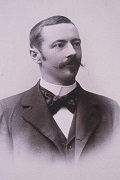
> *Maurice Paul Auguste Charles Fabry (1867, Marseille – 1945)*

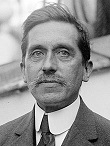
> *Jean-Baptiste Alfred Perot (1863, Metz  – 1925)*

When two partial reflecting mirrors with reflectivity, $R$, (transmission $= 1 - R$) are 
precisely aligned parallel, illuminated by a diffuse, broad, monochromatic source and 
are separated a distance, $d$, from each other, a set of concentric rings can be observed 
on a screen after imaging with a lens. These rings are the result of interference of 
multiple  beams and because of that, the Fabry Perot belongs to the class of multiple 
beam interferometers.The sharpness of the rings depends on the reflectivity of the mirrors 
and the ring- or fringe contrast is represented by the finesse of the Fabry Perot.

The Fabry Perot is very suitable to measure the wavelength difference of two sources emitting 
at wavelengths close together. In general the two wavelengths will produce two sets of concentric 
rings, which will overlap for certain conditions.

In this experiment the 550 nm line (from a green mercury lamp) is splitted by some means 
(for example by the Zeeman effect) and is measured by variation of the distance, $d$, between the mirrors.


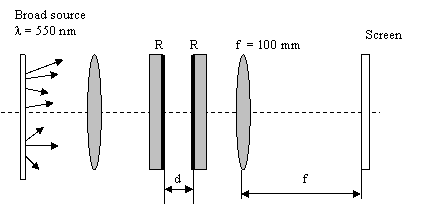
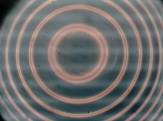
> *Experimental set-up of a Fabry Perot interferometer illuminated by a sodium (Na) lamp. The two Na D1 and D2 lines at 589.6 nm and 589.0 nm produce two sets of concentric rings observed with a CCD camera.*


### Measurement of the distance between two wavelengths.
   1. Show that, in air, overlap of the two sets of rings occurs for distances between the two mirrors: $d_p=\frac{\bar{\lambda}^2}{2\Delta\lambda}p$, where $p$ is an integer, $\Delta\lambda$ is the difference in wavelength, and $\bar{\lambda}$ is the mean wavelength. 
      Note that the angles with the optical axis of all the rays forming the rings 
      are very small. The wavelength separation, $\Delta\lambda$, is very small compared to the 
      average wavelength, $\bar{\lambda}$.
   2. Choose a suitable value for the finesse of the Fabry Perot.
   3. Switch on the line-splitting and measure the distances, $d$, where overlap of the fringes occurs.
   4. Calculate the wavelength-difference, $\Delta\lambda$, from the measurements. 
      The average (vacuum) wavelength, $\bar{\lambda}$, of the source is 550 nm.



Literature: Hecht, 5th ed., chapter 9. 

<IPython.core.display.Javascript object>


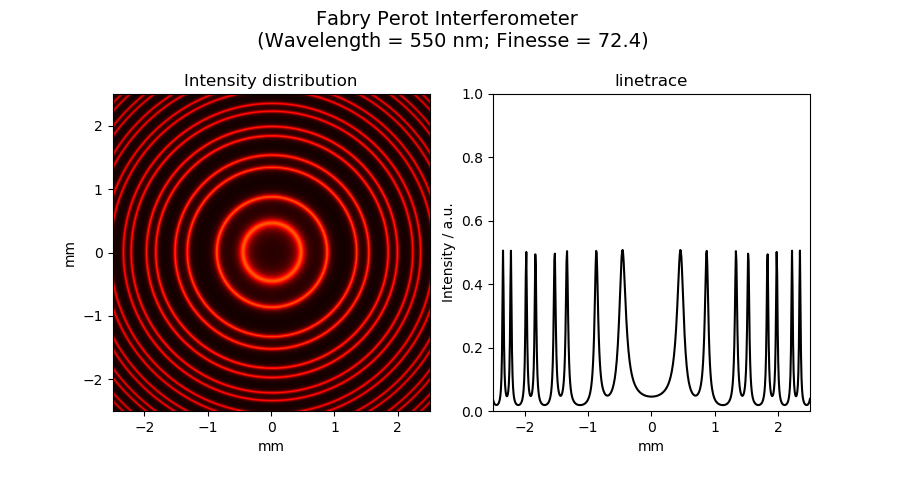

interactive(children=(Checkbox(value=True, description='Dual wavelength'), FloatSlider(value=3.5, continuous_u…

In [3]:
%matplotlib notebook
#!/usr/bin/env python
"""
    Computer practical. Fabry Perot interferometer.
    ====================================================================

    This is part of the 'computer practical' set of assignments.
    Demonstrates the Fabry Perot interferometer.
    Measure the distance between two wavelengths. 
    Find the refractive index of a medium between the two mirrors.
    
    ..  :copyright: (c) 2017 by Fred van Goor.
     adapted by j.s.kanger 2019
    :license: MIT, see License for more details.
    
"""
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

# Define system settings 
labda = 550e-9  # (mean) wavelength in [m]
delta_labda = 1.8e-9  # wavelength separation [m]
size = 5e-3  # size of the image [m]
N = 600  # size of image in pixels
f = 100e-3  # focal length of lens behind the Fabry Perot [m]
d = 6e-3  # distance between mirrors [m]
nmedium = 1.0  # refractive index of medium between mirrors

# define a matrix with the airgaps t
span = np.linspace(-size/2, size/2, N, endpoint=True)
theta = [np.sqrt(x**2 + y**2)/f for x, y in zip(*np.meshgrid(span, span))]
cos_theta = np.cos(theta)
xscale = span*1e3

# pre-allocate numpy arrays:
delta1 = np.zeros((N, N))
delta2 = np.zeros((N, N))
I = np.zeros((N, N))

# Initialize figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,5))
fig.suptitle('Fabry Perot Interferometer', fontsize=14)
ax1.set_aspect('equal', 'box')
ax1.set_xlabel('mm')
ax1.set_ylabel('mm')
ax1.set_title('Intensity distribution')
ext = size*1e3/2
img = ax1.imshow(I, interpolation='bicubic', cmap='hot', vmin=0, vmax=1, extent=[-ext, ext, -ext, ext])
ax2.set_aspect(2*ext)
ax2.set_xlabel('mm')
ax2.set_ylabel('Intensity / a.u.')
ax2.set_title('linetrace')
ax2.set_xlim(-ext, ext)
ax2.set_ylim(0, 1)
line, = ax2.plot([],[],'k')
plt.show()

def FabryPerotSim(DlabdaCheck, d, R):
    """
    calculates the ring pattern from a Fabry Perot given:
    distance between mirrors d in mm
    reflectivity of the mirrors R in %
    image intensity is controlled by Gain
    DlabdaCheck is a boolean to set single or double wavelengths
    """
    #  constants
    d = d*1e-3
    Fin = 4.0 * 0.01*R / (1.0 - 0.01*R)**2  # finesse
    fig.suptitle(f'Fabry Perot Interferometer \n (Wavelength = {labda*1e9:2.0f} nm; Finesse = {Fin:2.1f})', fontsize=14)
    
    # set wavelengths
    if DlabdaCheck:
        labda1 = labda - 0.5*delta_labda
        labda2 = labda + 0.5*delta_labda
    else:
        labda1 = labda
        labda2 = labda
    
    # evaluate phaseshifts
    k1 = 2 * np.pi / labda1   # wavenumber of shifted wavelength
    k2 = 2 * np.pi / labda2   # wavenumber of shifted wavelength
    delta1[::] = 2 * k1 * nmedium * d * cos_theta
    delta2[::] = 2 * k2 * nmedium * d * cos_theta
    
    # calculate intensities
    I[::] = (0.5 / (1. + Fin * np.sin(delta1/2)**2) + 0.5 / (1. + Fin * np.sin(delta2/2)**2))

    # plot
    img.set_data(I)
    #img.autoscale()
    line.set_data(xscale, I[int(N/2),:])
    ax1.format_coord = lambda x, y: \
                        f'x = {(-size/2 + x*size/(N-1))/1e-3:2.2f} mm, \
                            y = {(-size/2 + y*size/(N-1))/1e-3:2.2f} mm, \
                            Intensity = {I[int(x)][int(y)]:2.4f} a.u.'   
    
    return None


    
w=interact(FabryPerotSim,
           DlabdaCheck=widgets.Checkbox(value=True, description='Dual wavelength', disabled=False),
           d=widgets.FloatSlider(layout={'width':'initial'}, style={'description_width':'initial'}, 
                description='Mirror separation $d$ [mm]',min=2.000,max=5.000,step=0.01,value=3.500,continuous_update=False,readout_format='.2f'),
           R=widgets.FloatSlider(layout={'width':'initial'}, style={'description_width':'initial'}, 
                description='Reflection $R$ [%] ',min=0.0,max=99.0,step=0.1,value=70.0,continuous_update=False)
          )
